# Import packages

In [ ]:
#import the generic libraries
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import csv

#import nltk libraries
import nltk
#nltk.download('all')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image # for word cloud image

In [ ]:
#pip install pyspellchecker

In [ ]:
#spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

#Spell checker
from spellchecker import SpellChecker

In [ ]:
#Modelling
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD , NMF
from sklearn.metrics.pairwise import cosine_similarity
import xgboost as xgb

In [ ]:
#pip install pyLDAvis


In [ ]:
#Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,load_model
from keras.layers import Dense , Embedding , LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint

#To change  date to datetime
from datetime import datetime
import time
import re
import string
import scipy.sparse

#TextBlob
from textblob import TextBlob

#Gensim libraries
from gensim import corpora,models,similarities,matutils
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis
from gensim.models import CoherenceModel


In [ ]:
#To show all the columns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',300)

#To pickle dataframe
import pickle

#Avoid warnings
import warnings
warnings.filterwarnings("ignore")

#Enable logging for gensim -optional but important
import logging
logging.basicConfig(format='%(asctime)s  : %(levelname)s : %(message)s',level=logging.ERROR)

from IPython.display import clear_output
clear_output()

# Load the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving GrammarandProductReviews.csv to GrammarandProductReviews (1).csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['GrammarandProductReviews.csv']))
df

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universalmusicgroupcashmoney/14331328,pinkfridayromanreloadedreupwdvd/000000000,pinkfridayromanreloadedreupwdvd/b009ntnhju,0602537205981",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04T07:28:12Z,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.000Z,2017-12-20T12:28:00.000Z,2017-12-16T05:40:00.000Z,2017-12-07T09:27:00.000Z,2017-11-18T22:25:00.000Z",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/reviews/14331328?sort=helpfulness_desc&limit=200&offset=0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,"lundbergorganiccinnamontoastricecakes/b000fvzw8y,lundbergorganiccinnamontoastricecakes/b005grcqwc,073416000391,lundbergorganiccinnamontoastricecakes/b0013jlzbu,0073416000391,lundbergorganiccinnamontoastricecakes/555222704,lundberg/00574764,lundbergorganiccinnamontoastricecakes/563800996",Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,"lundbergorganiccinnamontoastricecakes/b000fvzw8y,lundbergorganiccinnamontoastricecakes/b005grcqwc,073416000391,lundbergorganiccinnamontoastricecakes/b0013jlzbu,0073416000391,lundbergorganiccinnamontoastricecakes/555222704,lundberg/00574764,lundbergorganiccinnamontoastricecakes/563800996",Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06T04:49:31Z,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,067981934427,0067981934427,kylovesensualitypleasuregel/553550989,kylovesensualitypleasuregel/b014gk947e,ky/067981934427",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,2017-09-11T17:13:57Z,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,06798193442

# Text Processing

In [ ]:
df.shape

(70941, 24)

In [ ]:
df.dtypes

id                      object
brand                   object
categories              object
dateAdded               object
dateUpdated             object
ean                     object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
reviews_date            object
reviews_dateAdded       object
reviews_dateSeen        object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_id             float64
reviews_numHelpful     float64
reviews_rating           int64
reviews_sourceURLs      object
reviews_text            object
reviews_title           object
reviews_username        object
upc                     object
Review                  object
dtype: object

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_username', 'upc', 'Review'],
      dtype='object')

In [ ]:
col_names = df.columns
new_col_names1 = [i.replace('.','_') for i in col_names]
df.columns = new_col_names1

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_username', 'upc', 'Review'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70941 entries, 0 to 71043
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   70941 non-null  object 
 1   brand                70941 non-null  object 
 2   categories           70941 non-null  object 
 3   dateAdded            70941 non-null  object 
 4   dateUpdated          70941 non-null  object 
 5   ean                  38969 non-null  object 
 6   keys                 70941 non-null  object 
 7   manufacturer         70800 non-null  object 
 8   manufacturerNumber   70739 non-null  object 
 9   name                 70941 non-null  object 
 10  reviews_date         70941 non-null  object 
 11  reviews_dateAdded    70941 non-null  object 
 12  reviews_dateSeen     70941 non-null  object 
 13  reviews_didPurchase  32156 non-null  object 
 14  reviews_doRecommend  60427 non-null  object 
 15  reviews_id           32156 non-null 

In [ ]:
df.isnull().sum()

id                         0
brand                      0
categories                 0
dateAdded                  0
dateUpdated                0
ean                    31972
keys                       0
manufacturer             141
manufacturerNumber       202
name                       0
reviews_date               0
reviews_dateAdded          0
reviews_dateSeen           0
reviews_didPurchase    38785
reviews_doRecommend    10514
reviews_id             38785
reviews_numHelpful     38436
reviews_rating             0
reviews_sourceURLs         0
reviews_text               0
reviews_title            464
reviews_username          89
upc                        2
Review                     0
dtype: int64

In [ ]:
#Percentage of null values in each column
df.isnull().mean().round(4)*100

id                      0.00
brand                   0.00
categories              0.00
dateAdded               0.00
dateUpdated             0.00
ean                    45.07
keys                    0.00
manufacturer            0.20
manufacturerNumber      0.28
name                    0.00
reviews_date            0.00
reviews_dateAdded       0.00
reviews_dateSeen        0.00
reviews_didPurchase    54.67
reviews_doRecommend    14.82
reviews_id             54.67
reviews_numHelpful     54.18
reviews_rating          0.00
reviews_sourceURLs      0.00
reviews_text            0.00
reviews_title           0.65
reviews_username        0.13
upc                     0.00
Review                  0.00
dtype: float64

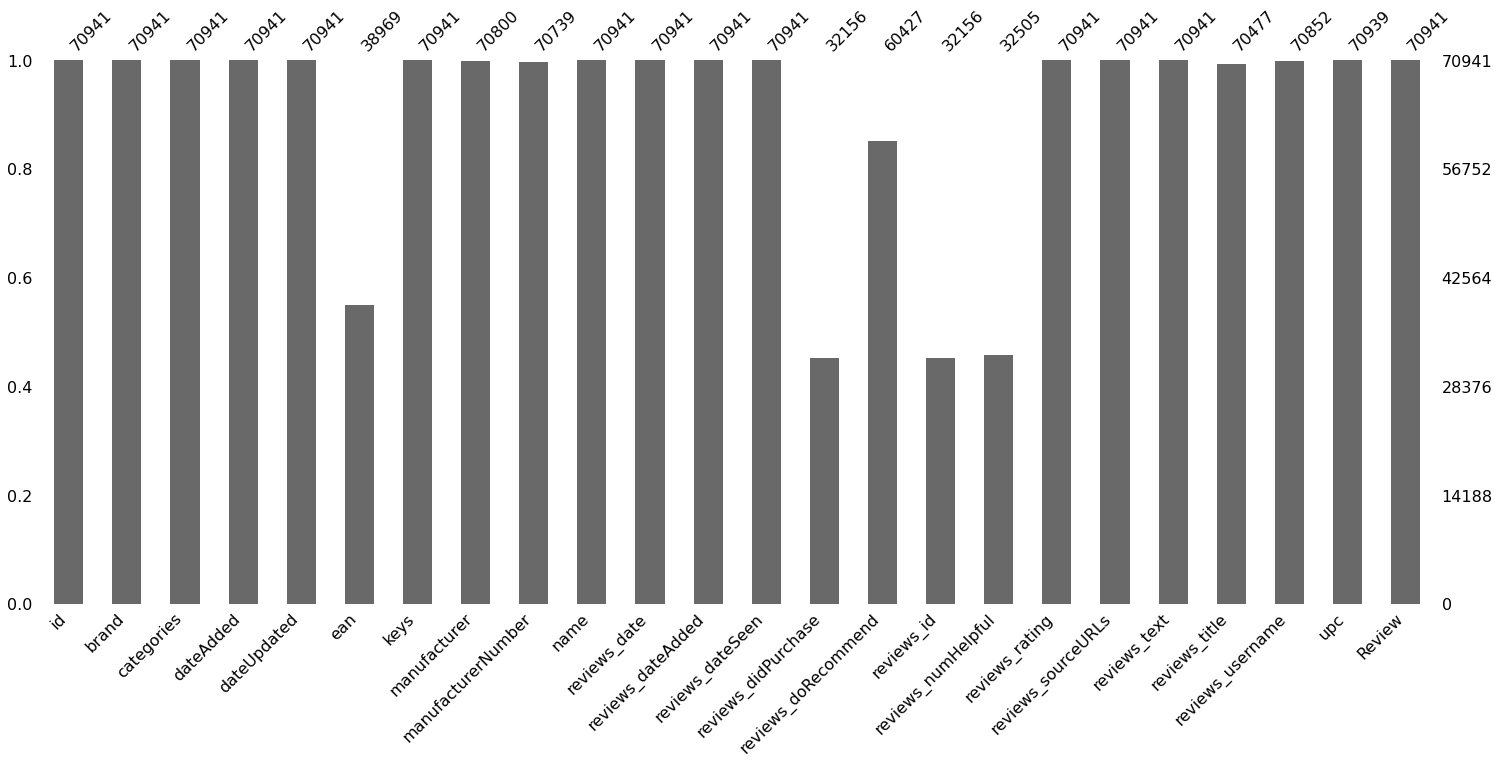

In [ ]:
import missingno
missingno.bar(df)

In [ ]:
print("Total missing values :",df.isnull().sum().values.sum())

Total missing values : 159390


In [ ]:
#Drop the columns with less than 20% values
missing_val_threshold = len(df) * .2
missing_val_threshold

14188.2

In [ ]:
df.dropna(thresh=missing_val_threshold,axis=1,inplace=True)

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_username', 'upc', 'Review'],
      dtype='object')

In [ ]:
df.shape

(70941, 24)

In [ ]:
#Drop rows which have missing values
df.dropna(subset=['reviews_text','reviews_date'],inplace=True)

In [ ]:
df.shape

(70941, 24)

In [ ]:
print("Percentage of missing values :")
print(df.isna().mean().round(4) * 100)

Percentage of missing values :
id                      0.00
brand                   0.00
categories              0.00
dateAdded               0.00
dateUpdated             0.00
ean                    45.07
keys                    0.00
manufacturer            0.20
manufacturerNumber      0.28
name                    0.00
reviews_date            0.00
reviews_dateAdded       0.00
reviews_dateSeen        0.00
reviews_didPurchase    54.67
reviews_doRecommend    14.82
reviews_id             54.67
reviews_numHelpful     54.18
reviews_rating          0.00
reviews_sourceURLs      0.00
reviews_text            0.00
reviews_title           0.65
reviews_username        0.13
upc                     0.00
Review                  0.00
dtype: float64


Combine Review Text and Title into one

In [ ]:
df['reviews_title']

0                     Just Awesome
1                             Good
2                             Good
3                     Disappointed
4                       Irritation
                   ...            
71039           Solves the problem
71040                 Great stuff!
71041                    My review
71042            Wonderful Product
71043    Makes The Holidays Better
Name: reviews_title, Length: 70941, dtype: object

In [ ]:
df['reviews_text']

0                                                                                                          i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1                                                                                                                                                                                                                                                     Good flavor. This review was collected as part of a promotion.
2                                                                                                                                                                                                                                                                                                       Good flavor.
3        I read through the reviews on here before looking in to buying o

In [ ]:
#Joining review and title column
df['Review'] = df['reviews_title'].map(str) + " " + df['reviews_text']

df['Review']

0                                                                                             Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1                                                                                                                                                                                                                                                Good Good flavor. This review was collected as part of a promotion.
2                                                                                                                                                                                                                                                                                                  Good Good flavor.
3        Disappointed I read through the reviews on here before looking i

Lowercasing

In [ ]:
#Lowercasing the reviews columns
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'][3]

"disappointed i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or 'captivating' sensation. what we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. it was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. i'm disappointed that i paid as much as i did for a lube that i won't use again, when i could just use their normal personal lubricant for 1) less money and 2) less mess."

Remove punctuation

In [ ]:
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'][0]

'just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy'

Remove stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['Review'] = df['Review'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop]))
df['Review'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy'

In [ ]:
df['Review']

0                                                                                                                                                                                              awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1                                                                                                                                                                                                                                                                   good good flavor review collected part promotion
2                                                                                                                                                                                                                                                                                                   good good flavor
3        disappointed read reviews looking buying one couples lubricants 

Word Count

In [ ]:
df['Review_WC'] = df['Review'].apply(lambda x : len(str(x).split(" ")))
df[['Review_WC','Review']].head(3)

,Review_WC,Review
0,20,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1,7,good good flavor review collected part promotion
2,3,good good flavor


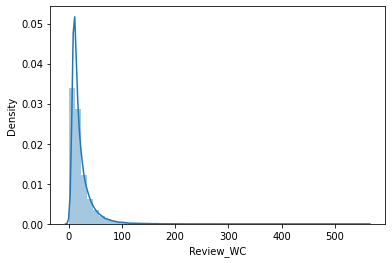

In [ ]:
#Density plot and histogram of all word count
sns.distplot(df['Review_WC'],hist=True,kde=True)

Character Count

In [ ]:
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head()

,Review_CC,Review
0,117,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1,48,good good flavor review collected part promotion
2,16,good good flavor
3,436,disappointed read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since...
4,99,irritation husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel


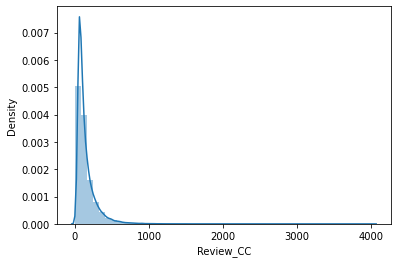

In [ ]:
#Density plot and histogram of all word count
sns.distplot(df['Review_CC'],hist=True,kde=True)

Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [ ]:
df['Review_AWL'] = df['Review'].apply(lambda x : avg_word(x))

In [ ]:
df[['Review_AWL','Review']].head()

,Review_AWL,Review
0,4.900000,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1,6.000000,good good flavor review collected part promotion
2,4.666667,good good flavor
3,6.534483,disappointed read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since...
4,5.666667,irritation husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel


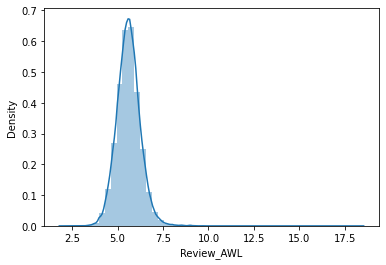

In [ ]:
#Density plot and histogram of all word count
sns.distplot(df['Review_AWL'],hist=True,kde=True)

Top 30 Common Words

In [ ]:
def freq_words(x,terms=30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({
      'word' : list(fdist.keys()),
      'count' : list(fdist.values())
  })

  #selecting top 20 frequent words
  d = words_df.nlargest(columns='count',n=terms)
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d,x="count",y="word")
  ax.set(ylabel="Word")
  plt.show()

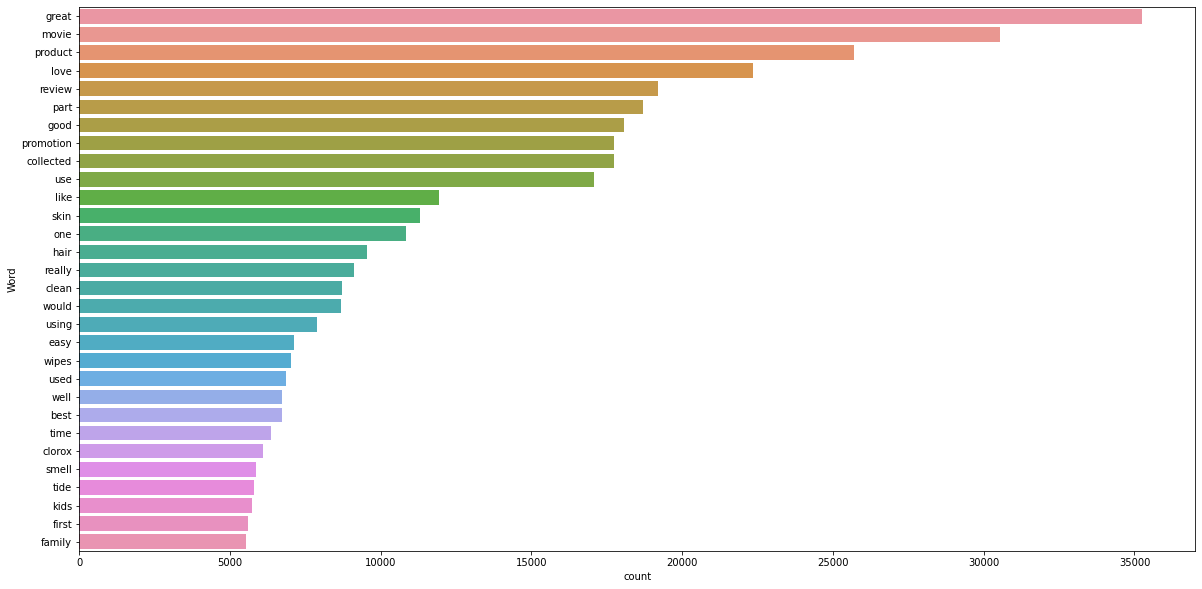

In [ ]:
freq_words(df['Review'])

Top 30 Rare words

In [ ]:
def freq_words(x,terms=30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({
      'word' : list(fdist.keys()),
      'count' : list(fdist.values())
  })

  #selecting top 20 frequent words
  d = words_df.nsmallest(columns='count',n=terms)
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d,x="count",y="word")
  ax.set(ylabel="Word")
  plt.show()

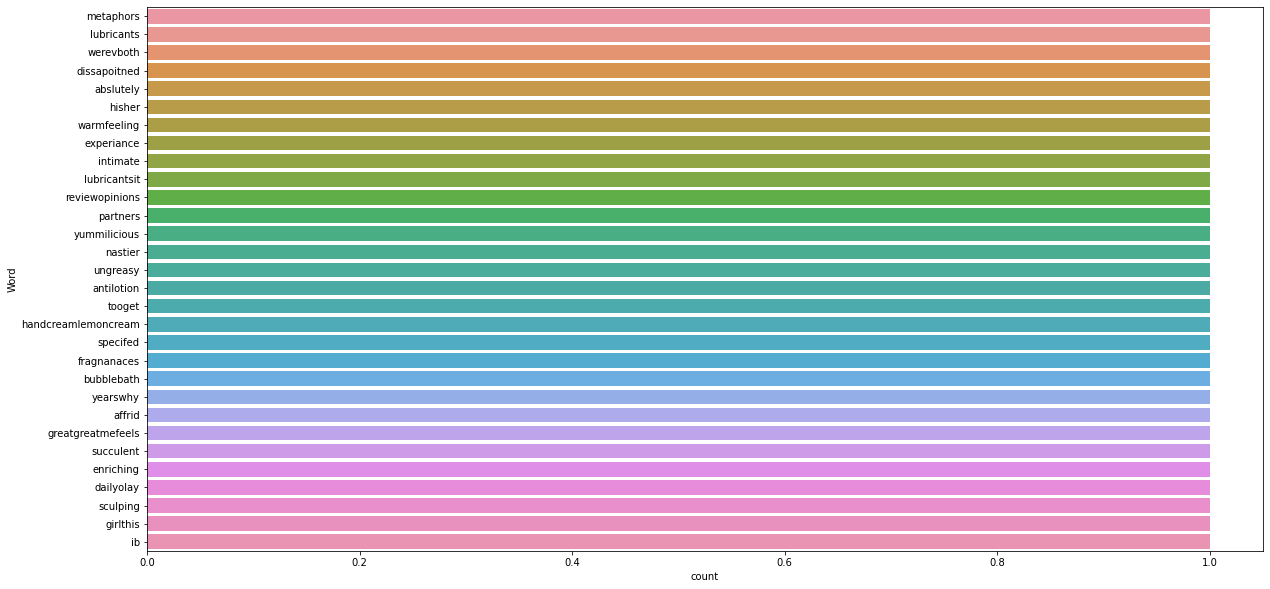

In [ ]:
freq_words(df['Review'])

Term Frequency

In [ ]:
df_tf = (df['Review'][0:1]).apply(lambda x : pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
df_tf.columns = ['words','tf']
df_tf

,words,tf
0,awesome,1
1,love,1
2,metaphors,1
3,way,1
4,rating,1
5,5star,1
6,give,1
7,gym,1
8,everyday,1
9,listen,1


IDF

In [ ]:
for i,word in enumerate(df_tf['words']):
  df_tf.loc[i,'idf'] = np.log(df_tf.shape[0]/len(df[df['Review'].str.contains(word)]))

In [ ]:
df_tf

,words,tf,idf
0,awesome,1,-5.164786
1,love,1,-7.022467
2,metaphors,1,2.995732
3,way,1,-5.973937
4,rating,1,-3.312366
5,5star,1,0.693147
6,give,1,-4.647751
7,gym,1,-1.398717
8,everyday,1,-3.726898
9,listen,1,-2.537657


Tf-idf

In [ ]:
df_tf['tf_idf'] = df_tf['tf'] * df_tf['idf']
df_tf

,words,tf,idf,tf_idf
0,awesome,1,-5.164786,-5.164786
1,love,1,-7.022467,-7.022467
2,metaphors,1,2.995732,2.995732
3,way,1,-5.973937,-5.973937
4,rating,1,-3.312366,-3.312366
5,5star,1,0.693147,0.693147
6,give,1,-4.647751,-4.647751
7,gym,1,-1.398717,-1.398717
8,everyday,1,-3.726898,-3.726898
9,listen,1,-2.537657,-2.537657


Transforming Reviews Date to Python DateTime Format

In [ ]:
df['reviews_date'] = df['reviews_date'].str.replace(".000Z","")
df['reviews_date'] = df['reviews_date'].str.replace("Z","")

In [ ]:
date = []
for i,j in enumerate(df['reviews_date']):
  try:
    date.append(datetime.strptime(j,"%Y-%m-%dT%H:%M:%S"))
  except:
    print(i)
    j = df['reviews_date'][0]
    date.append(datetime.strptime(j,"%Y-%m-%dT%H:%M:%S"))

df['reviews_date'] = date

28687
28688
28689
28690
28691
28692
28693
28694


#Exploratory Data Analysis

Unique Values

In [ ]:
df.nunique()

id                       594
brand                    387
categories               575
dateAdded                592
dateUpdated              348
ean                      467
keys                     594
manufacturer             458
manufacturerNumber       578
name                     594
reviews_date           13006
reviews_dateAdded       3185
reviews_dateSeen       17462
reviews_didPurchase        2
reviews_doRecommend        2
reviews_id             31372
reviews_numHelpful        72
reviews_rating             5
reviews_sourceURLs     22492
reviews_text           64848
reviews_title          42616
reviews_username       57998
upc                      556
Review                 64873
Review_WC                241
Review_CC               1075
Review_AWL              3973
dtype: int64

Distribution of top 25 reviewed brands

In [ ]:
df['brand'] = df['brand'].replace("L'oreal Paris","L'Oreal Paris")
df['brand'] = df['brand'].replace("Sony","Sony Pictures")  

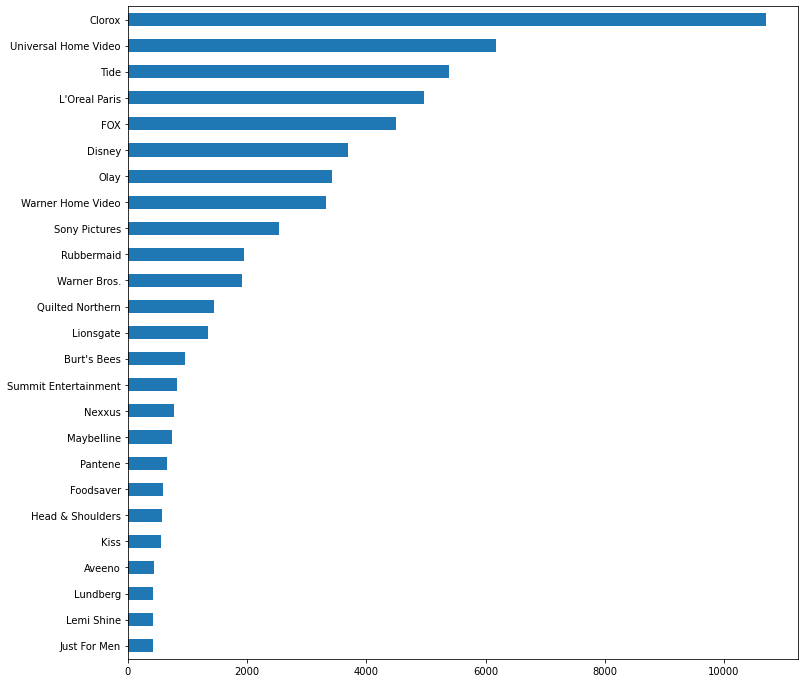

In [ ]:
plt.figure(figsize=(12,12))
df['brand'].value_counts()[0:25].sort_values().plot(kind='barh')

Distribution of top 25 reviewed brands

In [ ]:
df["product_cat"] = df["categories"].apply(lambda x: x.split(",")[0])

df['product_cat'] = df['product_cat'].replace("Movies","Movies & TV Shows")
df['product_cat'] = df['product_cat'].replace("Food","Food & Beverage")
df['product_cat'] = df['product_cat'].replace("Household Chemicals","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Music on CD or Vinyl","Musical Instruments & Karaoke")
df['product_cat'] = df['product_cat'].replace("Pro Audio","Musical Instruments & Karaoke")
df['product_cat'] = df['product_cat'].replace("Baby","Kids")
df['product_cat'] = df['product_cat'].replace("Kids' Rooms","Kids")
df['product_cat'] = df['product_cat'].replace("Brand Shop","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Featured Brands","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Home Improvement","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Furniture","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Video Games","Sports & Outdoors")
df['product_cat'] = df['product_cat'].replace("Home","Household Essentials")
df['product_cat'] = df['product_cat'].replace("Mobile","Electronics")
df['product_cat'] = df['product_cat'].replace("Photography","Electronics")
df['product_cat'] = df['product_cat'].replace("Patio & Garden","Accessories")
df['product_cat'] = df['product_cat'].replace("Gift Finder","Accessories")
df['product_cat'] = df['product_cat'].replace("Auto & Tires","Accessories")
df['product_cat'] = df['product_cat'].replace("Kitchen & Dining","Food & Beverage")


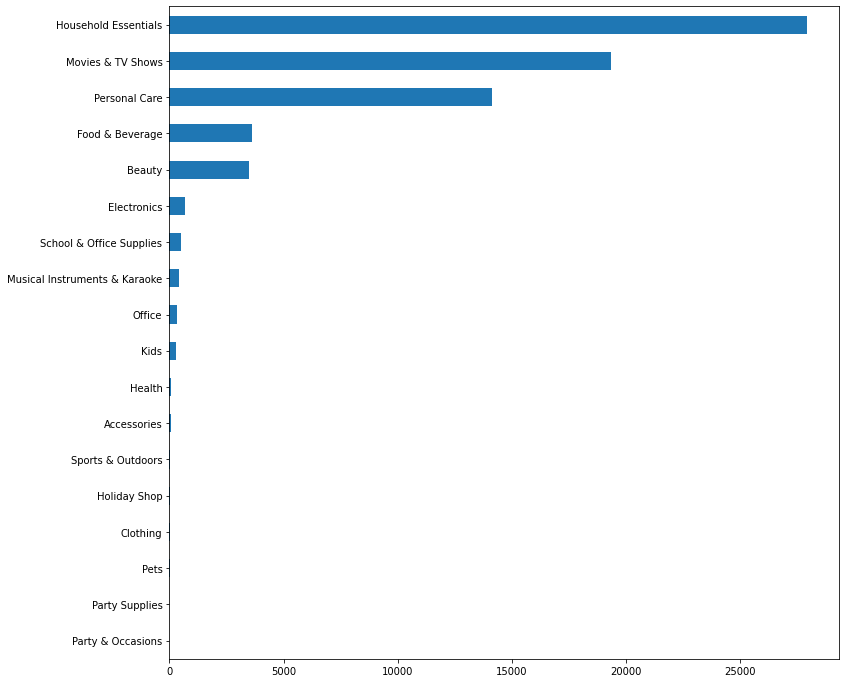

In [ ]:
plt.figure(figsize=(12,12))
df['product_cat'].value_counts()[0:25].sort_values().plot(kind='barh')

Distribution of top 25 reviewed manufactures

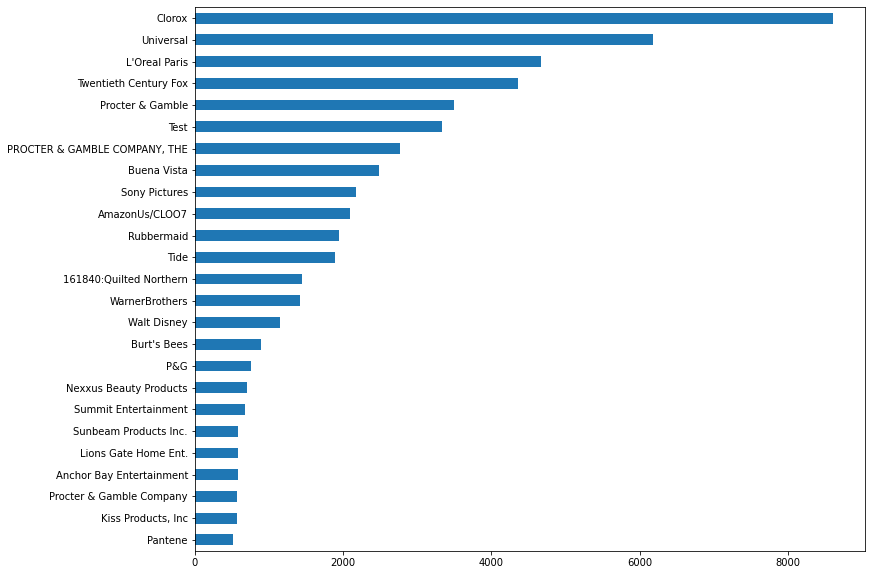

In [ ]:
plt.figure(figsize=(12,10))
df['manufacturer'] = df['manufacturer'].replace("L'oreal Paris","L'Oreal Paris")
df['manufacturer'] = df['manufacturer'].replace("SONY CORP","Sony Pictures")
df['manufacturer'].value_counts()[0:25].sort_values().plot(kind = 'barh')

Distribution of Review Ratings

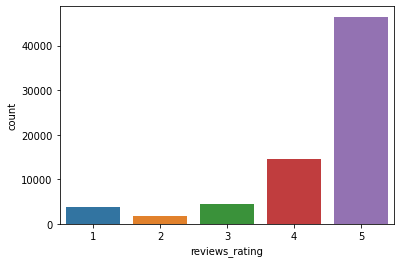

In [ ]:
sns.countplot(df['reviews_rating'])

Year Wise Ratings



In [ ]:
df['hour'], df['minute'], df['second'] = df['reviews_date'].dt.hour, df['reviews_date'].dt.minute, df['reviews_date'].dt.second

In [ ]:
df['hour'], df['minute'], df['second'] = df['reviews_date'].dt.hour, df['reviews_date'].dt.minute, df['reviews_date'].dt.second

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_username', 'upc', 'Review', 'Review_WC', 'Review_CC',
       'Review_AWL', 'product_cat', 'hour', 'minute', 'second'],
      dtype='object')

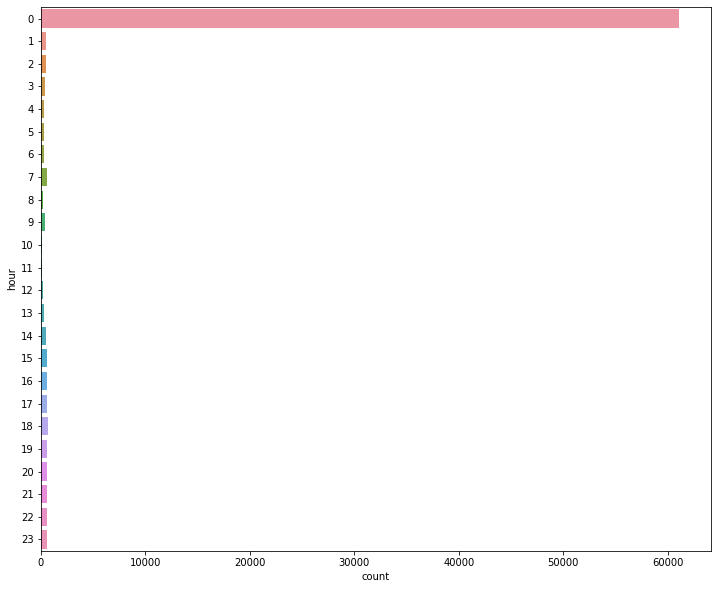

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['hour'])

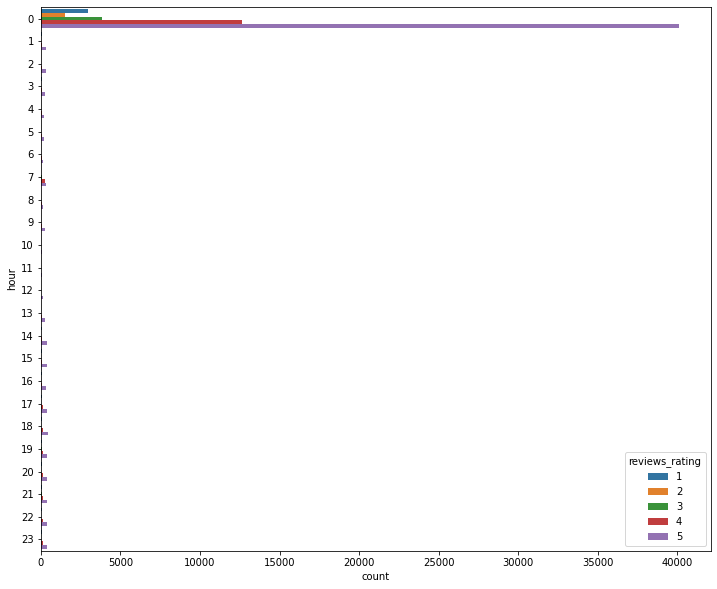

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['hour'],hue=df['reviews_rating'])

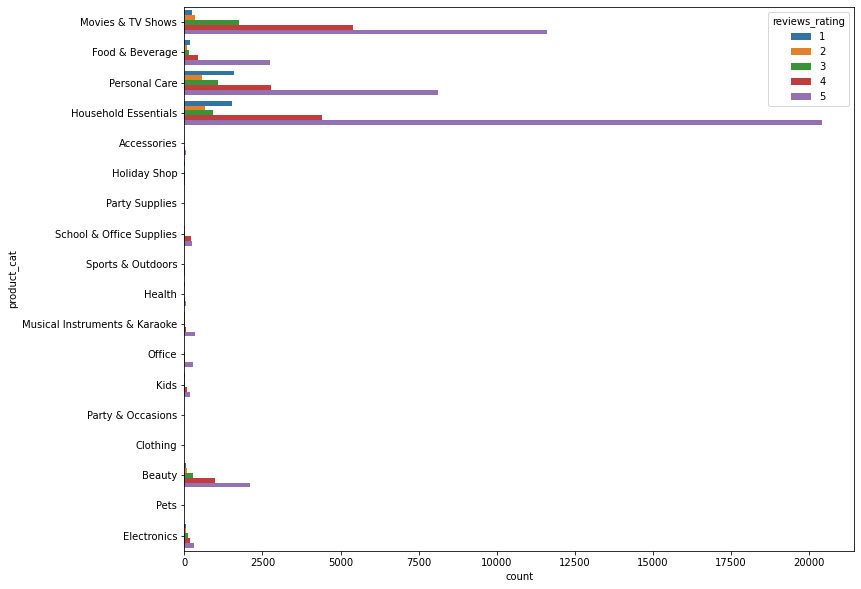

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['product_cat'],hue=df['reviews_rating'])

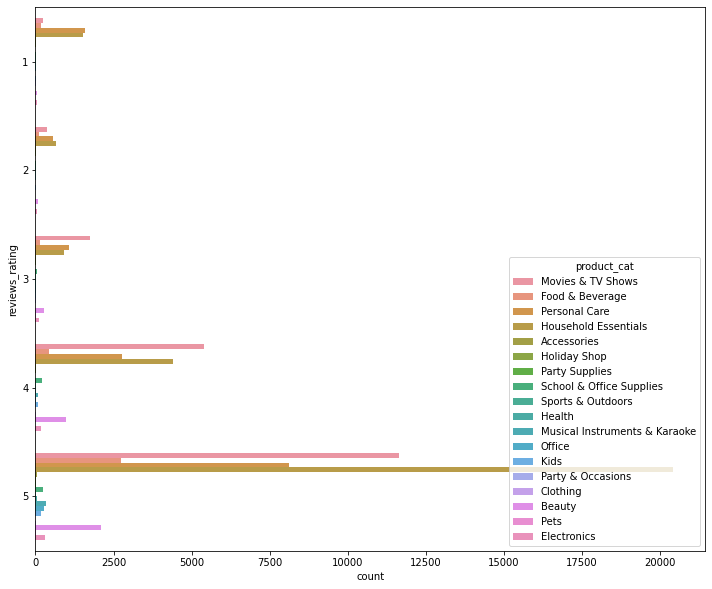

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['reviews_rating'],hue=df['product_cat'])

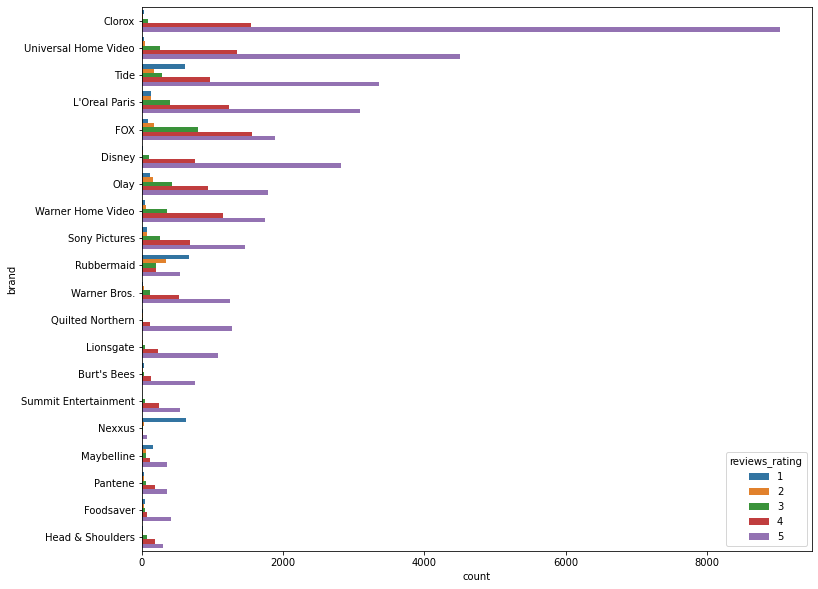

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['brand'], hue=df['reviews_rating'], order=df['brand'].value_counts().iloc[:20].index)

Word Cloud

In [254]:
wo = WordCloud(stopwords = STOPWORDS).generate(' '.join(df['Review']))
wo

(-0.5, 399.5, 199.5, -0.5)

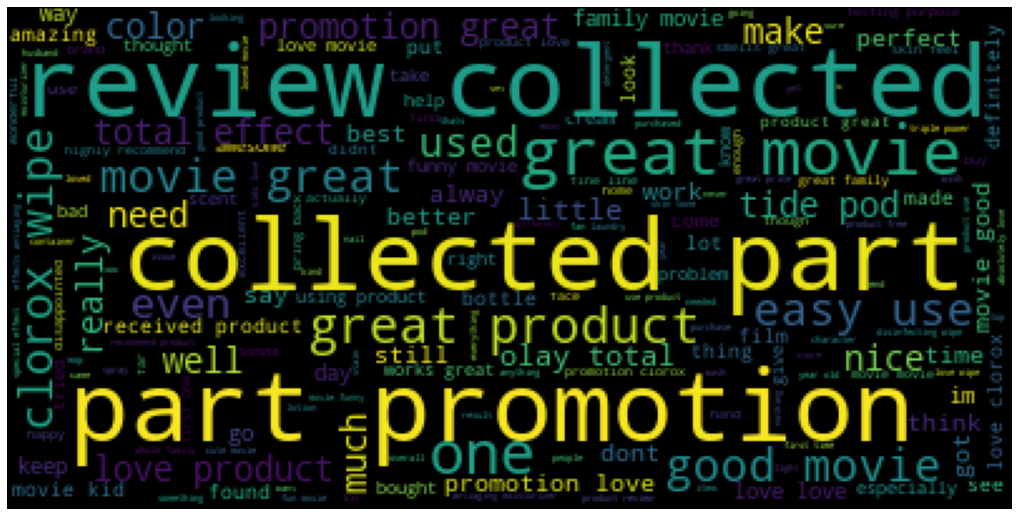

In [255]:
plt.figure(figsize=(18,18))
plt.imshow(wo)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

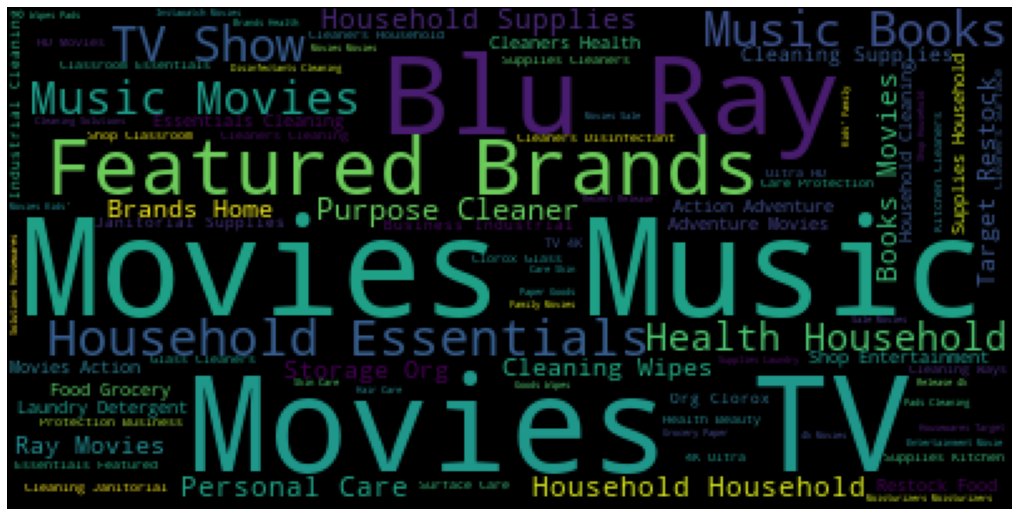

In [257]:
wo = WordCloud(stopwords = STOPWORDS).generate(' '.join(df['categories']))
plt.figure(figsize=(18,18))
plt.imshow(wo)
plt.axis("off")

Correlation Matrix

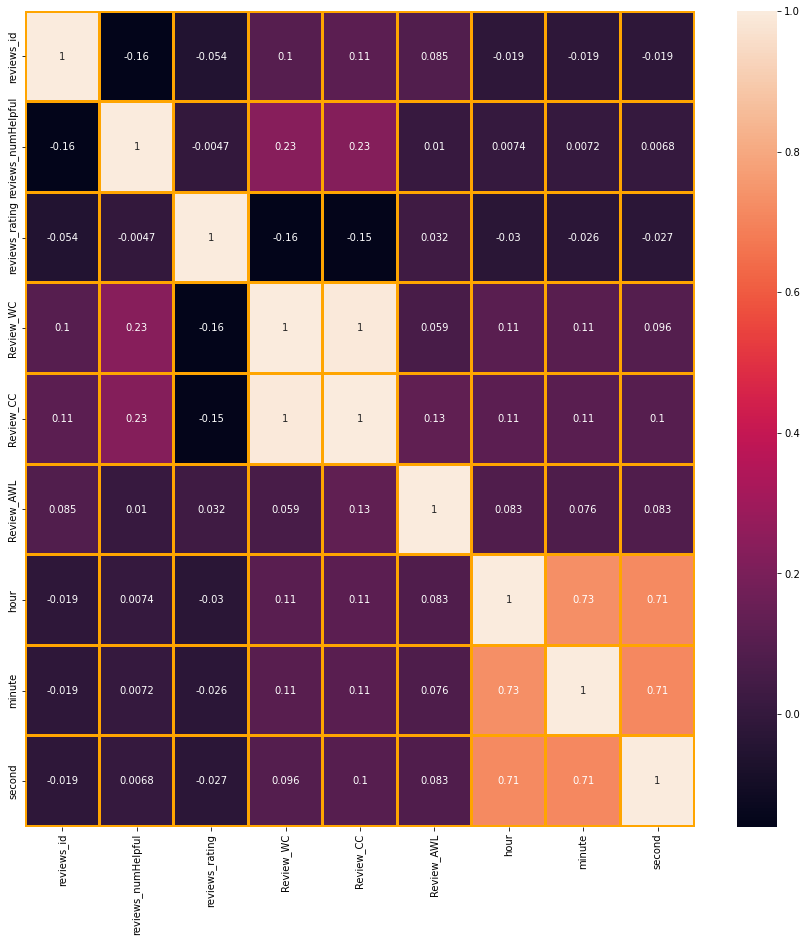

In [258]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linecolor='orange',linewidths=2)

## Training Data Preparation

In [259]:
X = df['Review']
Y = df['reviews_rating']

Using the n-gram tfidf vectorizer

In [260]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    strip_accents = 'unicode',
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    stop_words = 'english',
    ngram_range = (1,3)
)

In [261]:
word_vectorizer.fit(X)
train_word_features = word_vectorizer.transform(X)

In [263]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)

char_vectorizer.fit(X)
train_char_features = char_vectorizer.transform(X)

train_features = hstack([train_char_features, train_word_features])

Splitting the data into train and test features

In [264]:
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(train_features, Y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (49658, 1463572)
y_train (49658,)
X_test (21283, 1463572)
y_test (21283,)


#ML MODEL

Random Forest Classifier

In [265]:
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=seed,n_jobs=-1)
classifier.fit(X_train,y_train)

preds1 = classifier.predict(X_test)

time_taken = time.time()-time1
print("Time Taken : ",time_taken)

Time Taken :  1477.1137607097626


In [266]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.7241930179016116
              precision    recall  f1-score   support

           1       0.54      0.83      0.65       675
           2       0.17      1.00      0.29        95
           3       0.13      0.88      0.23       197
           4       0.17      0.73      0.27      1008
           5       0.99      0.72      0.83     19308

    accuracy                           0.72     21283
   macro avg       0.40      0.83      0.46     21283
weighted avg       0.93      0.72      0.79     21283

[[  560    65    35     8     7]
 [    0    95     0     0     0]
 [    0     2   173    18     4]
 [    5    18   130   733   122]
 [  475   379   967  3635 13852]]


Logistic Regression

In [267]:
time1 = time.time()

logit = LogisticRegression(C=1,multi_class='ovr')
logit.fit(X_train,y_train)

preds3 = logit.predict(X_test)

time_taken = time.time()-time1
print("Time Taken : ",time_taken)

Time Taken :  228.9313247203827


In [268]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.7396513649391533
              precision    recall  f1-score   support

           1       0.70      0.74      0.72       983
           2       0.06      0.79      0.11        43
           3       0.21      0.59      0.31       465
           4       0.29      0.55      0.38      2307
           5       0.96      0.77      0.85     17485

    accuracy                           0.74     21283
   macro avg       0.44      0.69      0.47     21283
weighted avg       0.86      0.74      0.78     21283

[[  725   139    72    25    22]
 [    3    34     5     1     0]
 [   25    63   276    78    23]
 [   35    93   418  1264   497]
 [  252   230   534  3026 13443]]


# Deep Learning Model

In [269]:
# To classify ratings<4 as sentiment, i.e. replace ratings less than 4 as not happy
# label 1= Happy
# label 2= Unhappy

df['sentiment'] = df['reviews_rating']<4
train_text, test_text, train_y, test_y = train_test_split(df['Review'],df['sentiment'],test_size = 0.2)

In [270]:
# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

In [271]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(texts_train)

sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 33335 unique tokens.


In [272]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (56752, 200)
Shape of data test tensor: (14189, 200)


In [273]:
model = Sequential()
model.add(Embedding(20000,128))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1,activation='sigmoid'))

In [274]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [275]:
history = model.fit(x_train,train_y,epochs=10,batch_size=128,validation_data=[x_test,test_y])

Epoch 1/10
444/444 [==============================] - 579s 1s/step - loss: 0.2399 - accuracy: 0.9105 - val_loss: 0.2032 - val_accuracy: 0.9233
Epoch 2/10
444/444 [==============================] - 587s 1s/step - loss: 0.1623 - accuracy: 0.9422 - val_loss: 0.1973 - val_accuracy: 0.9278
Epoch 3/10
444/444 [==============================] - 574s 1s/step - loss: 0.1326 - accuracy: 0.9529 - val_loss: 0.2032 - val_accuracy: 0.9283
Epoch 4/10
444/444 [==============================] - 560s 1s/step - loss: 0.1062 - accuracy: 0.9630 - val_loss: 0.2202 - val_accuracy: 0.9201
Epoch 5/10
444/444 [==============================] - 583s 1s/step - loss: 0.0908 - accuracy: 0.9691 - val_loss: 0.2525 - val_accuracy: 0.9261
Epoch 6/10
444/444 [==============================] - 590s 1s/step - loss: 0.0770 - accuracy: 0.9737 - val_loss: 0.2720 - val_accuracy: 0.9254
Epoch 7/10
444/444 [==============================] - 651s 1s/step - loss: 0.0655 - accuracy: 0.9782 - val_loss: 0.3221 - val_accuracy: 0.9171

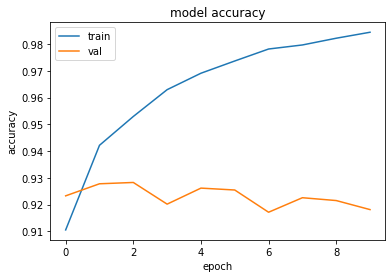

In [276]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

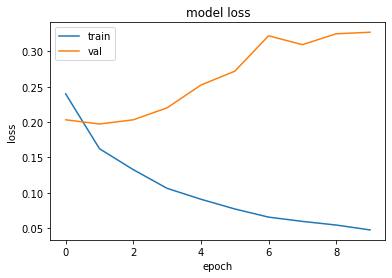

In [277]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show() 

In [278]:
model.evaluate(x_test,test_y)

444/444 [==============================] - 33s 74ms/step - loss: 0.3272 - accuracy: 0.9181


[0.3271506726741791, 0.9181056022644043]